### Titanic Project
Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
import pickle as pkl

In [44]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df = df.drop(['PassengerId','Cabin','Ticket'],axis=1)

In [46]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [47]:
df.shape

(891, 9)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [49]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [50]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


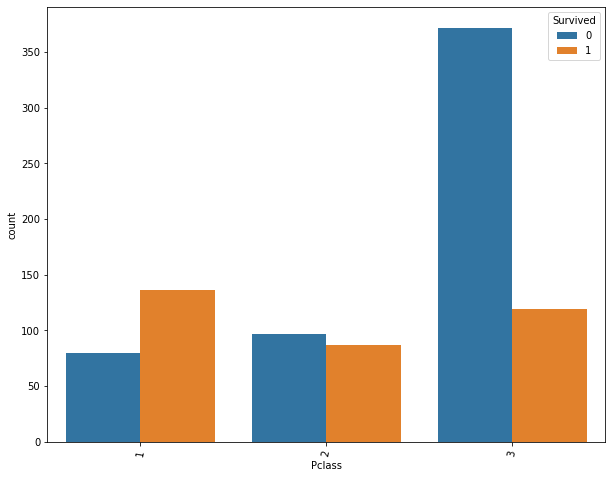

In [52]:
plt.figure(figsize=(10,8))
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.xticks(rotation=80)
plt.show()

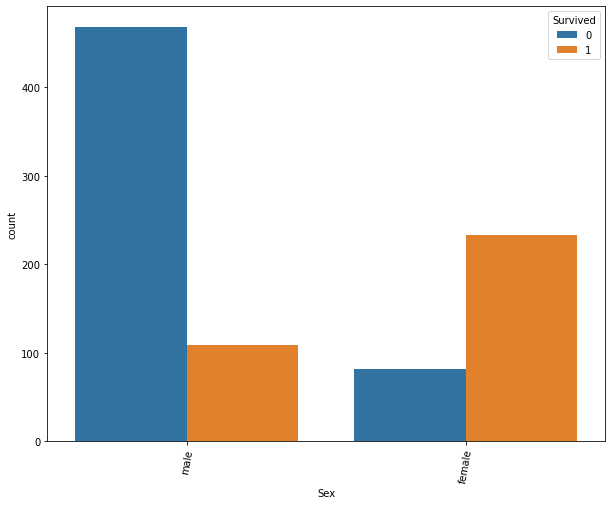

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.xticks(rotation=80)
plt.show()

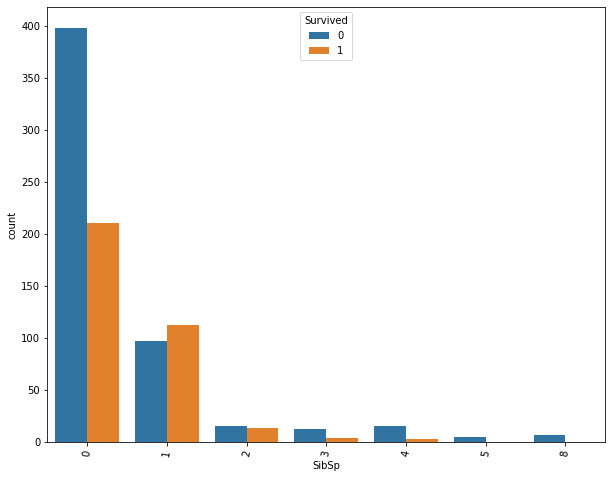

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(x="SibSp", hue="Survived", data=df)
plt.xticks(rotation=80)
plt.show()

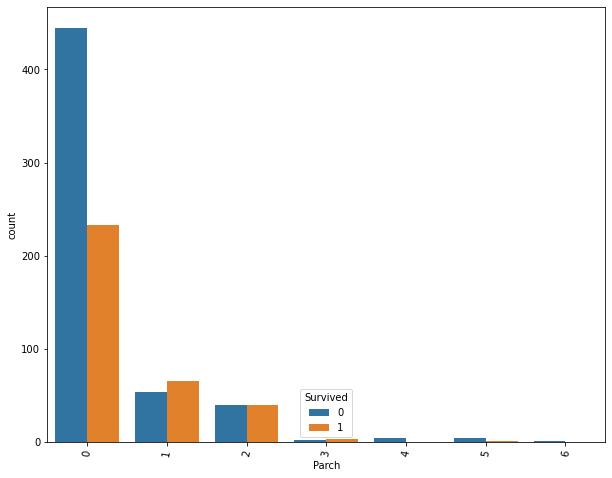

In [34]:
plt.figure(figsize=(10,8))
sns.countplot(x="Parch", hue="Survived", data=df)
plt.xticks(rotation=80)
plt.show()

In [53]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [54]:
columns = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']

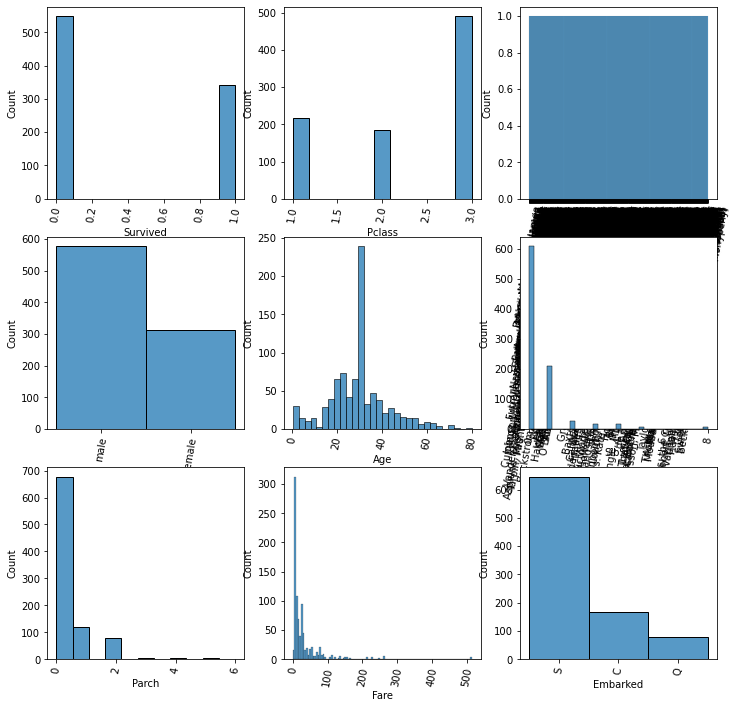

In [55]:
count=1
plt.subplots(figsize=(12,12))
for i in columns:
    plt.subplot(3,3,count)
    sns.histplot(df[i])
    plt.xticks(rotation=80)
    count+=1

plt.show()

In [56]:
df.select_dtypes(include=['object']).columns

Index(['Name', 'Sex', 'Embarked'], dtype='object')

In [57]:
categorical = ['Name', 'Sex', 'Embarked']

In [58]:
lab = LabelEncoder()
for i in categorical:
    df[i] = lab.fit_transform(df[i])

print(df.dtypes)

Survived    int64  
Pclass      int64  
Name        int32  
Sex         int32  
Age         float64
SibSp       int64  
Parch       int64  
Fare        float64
Embarked    int32  
dtype: object


In [59]:
df.corr()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Name,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,-0.049173,-0.006117
Sex,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,-0.006117,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


<AxesSubplot:>

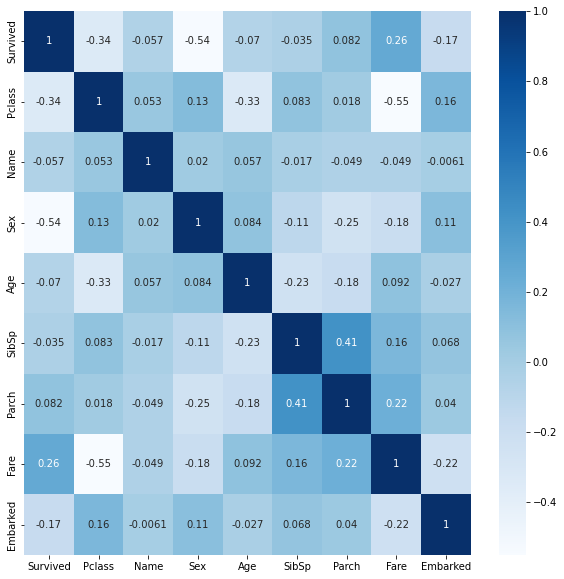

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [61]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Name        0.000000
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

In [62]:
for i in columns :
    if df.skew().loc[i]>0.60:
        df[i] = np.log1p(df[i])

In [63]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Name        0.000000
Sex        -0.618921
Age         0.434488
SibSp       1.661245
Parch       1.675439
Fare        0.394928
Embarked   -1.264823
dtype: float64

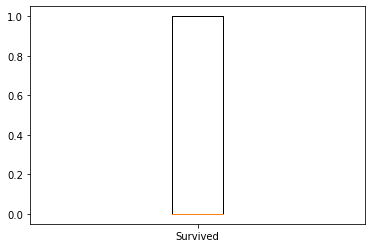

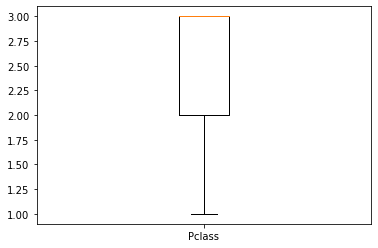

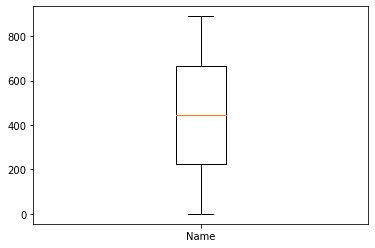

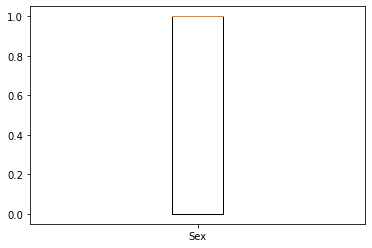

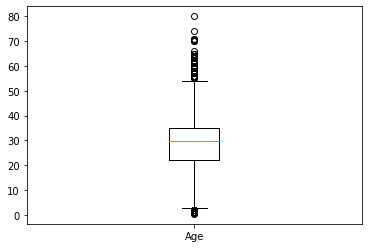

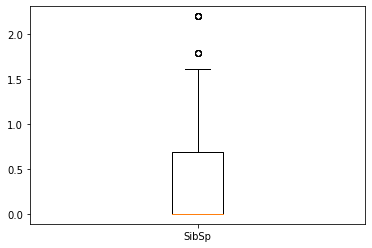

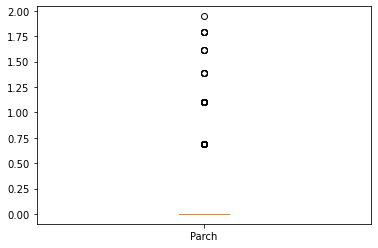

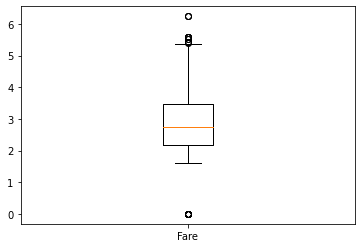

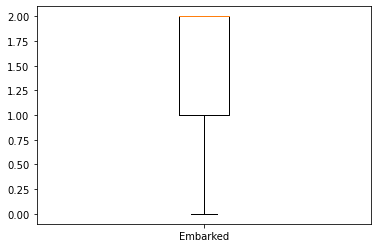

In [64]:
for i in columns:
    plt.boxplot(df[i], labels = [i])
    plt.show()

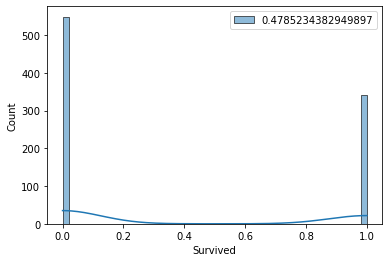

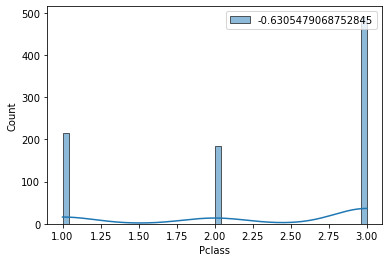

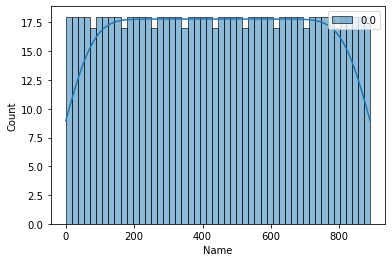

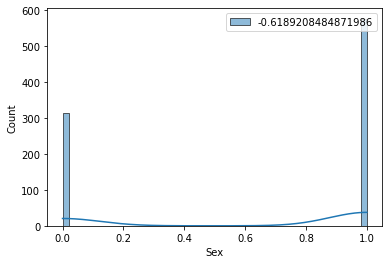

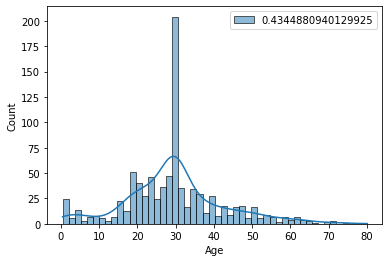

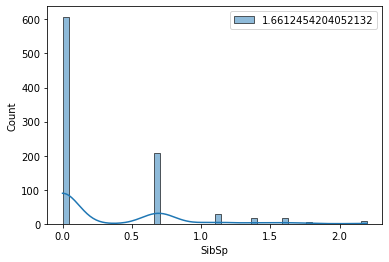

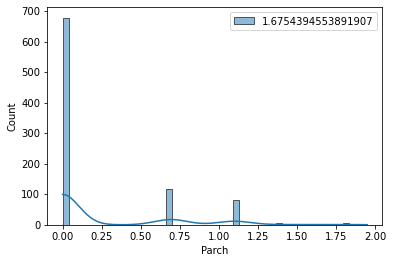

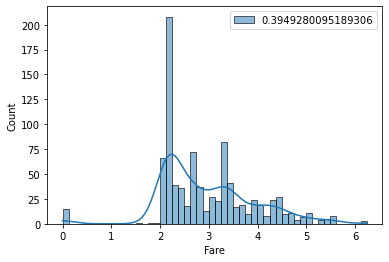

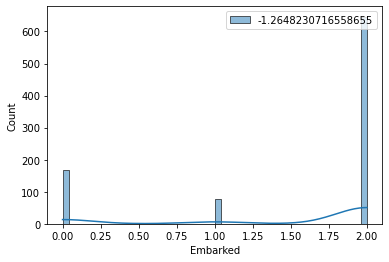

In [65]:
for i in columns:
    sns.histplot(df[i], kde = True, bins = 50, label = df[i].skew())
    plt.legend(loc = 'upper right')
    plt.show()

In [66]:
for i in columns:
    Q1,Q3 = np.percentile(df[i] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    df_no_outliers = df[(df[i] < lower_range) | (df[i] > upper_range)]

In [67]:
df_no_outliers

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


In [68]:
z = np.abs(zscore(df))
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([  0,   0,   0, ..., 890, 890, 890], dtype=int64), array([0, 1, 2, ..., 6, 7, 8], dtype=int64))
(891, 9)


In [69]:
df_new = df[(z<3).all(axis = 1)]
df_new.shape

(844, 9)

In [70]:
X = df_new.drop(['Survived'],axis=1)
y = df_new['Survived']

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
for i in X.columns:
    scaler = StandardScaler()
    X[i] = scaler.fit_transform(X[i].values.reshape(-1, 1))

In [74]:
reg_model = [LinearRegression(),GradientBoostingRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),ExtraTreesRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(42,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size = 0.33)
    for i in reg_model:
        i.fit(X_train,y_train)
        pred = i.predict(X_test)
        r2_scores = r2_score(y_test,pred)
        print("R2 score for the random state is" ,r_state ,"is", r2_scores)
        if r2_scores > max_r2_score:
            max_r2_score = r2_scores
            final_state = r_state
            final_model = i
print()
print()
print()
print()
print("Maximum R2 score in the random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score for the random state is 42 is 0.4330541047487384
R2 score for the random state is 42 is 0.48651556230745174
R2 score for the random state is 42 is 0.4385832087336806
R2 score for the random state is 42 is 0.17759764185703775
R2 score for the random state is 42 is 0.34912727655542686
R2 score for the random state is 42 is 0.39323007158648293
R2 score for the random state is 42 is 0.4875581534898411
R2 score for the random state is 43 is 0.38519391192027785
R2 score for the random state is 43 is 0.5209123933260995
R2 score for the random state is 43 is 0.40304018121070095
R2 score for the random state is 43 is 0.03793103448275836
R2 score for the random state is 43 is 0.37205911330049246
R2 score for the random state is 43 is 0.3688491625615763
R2 score for the random state is 43 is 0.472175369458128
R2 score for the random state is 44 is 0.4164716140273639
R2 score for the random state is 44 is 0.4632175556834921
R2 score for the random state is 44 is 0.46624086455961855
R2 sco

In [77]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]

In [78]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [79]:
GBR=GradientBoostingRegressor()
RandomizedSearch_GBR=RandomizedSearchCV(estimator=GBR,param_distributions=param_grid,n_iter=100,cv=3,verbose=2,
                               random_state=86,n_jobs=-1)
RandomizedSearch_GBR.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=86, verbose=2)

In [80]:
RandomizedSearch_GBR.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120}

In [81]:
RandomizedSearch_GBR.best_estimator_

GradientBoostingRegressor(max_depth=120, max_features='sqrt',
                          min_samples_split=5, n_estimators=700)

In [82]:
GBR = GradientBoostingRegressor(n_estimators=700,min_samples_split=5,min_samples_leaf=5,max_features='sqrt',max_depth=120,random_state=86)
GBR.fit(X_train,y_train)
pred = GBR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 29.436657681481837


In [83]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  0.2803443098090671
Mean squared Error:  0.1662350909465431
Root Mean Absolute Error:  0.5294755044466808


Text(0, 0.5, 'Predicted_Y')

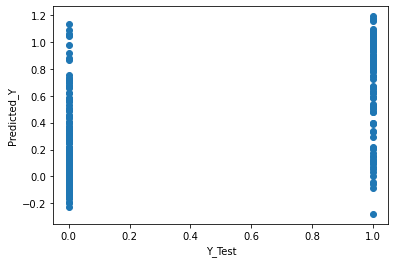

In [84]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

<AxesSubplot:>

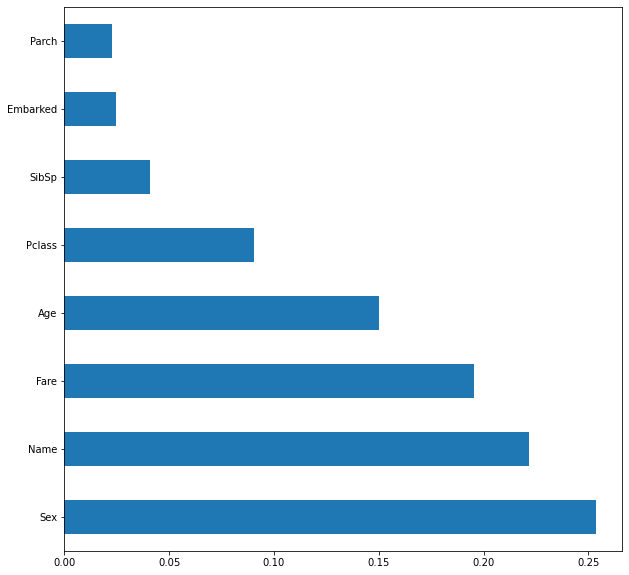

In [85]:
plt.figure(figsize=(10,10))
feat_importances = pd.Series(GBR.feature_importances_, index=X_train.columns)
feat_importances.nlargest(70).plot(kind='barh')

In [86]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [87]:
classification_model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size = 0.33)
    for j in classification_model:
        j.fit(X_train,y_train)
        pred_c = j.predict(X_test)
        ac_score = accuracy_score(y_test,pred_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model_classification = j
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model_classification)

accuracy score correspond to random state  40 is 0.7670250896057348
accuracy score correspond to random state  40 is 0.8136200716845878
accuracy score correspond to random state  41 is 0.7491039426523297
accuracy score correspond to random state  41 is 0.7956989247311828
accuracy score correspond to random state  42 is 0.8100358422939068
accuracy score correspond to random state  42 is 0.7849462365591398
accuracy score correspond to random state  43 is 0.7706093189964157
accuracy score correspond to random state  43 is 0.8028673835125448
accuracy score correspond to random state  44 is 0.8064516129032258
accuracy score correspond to random state  44 is 0.8028673835125448
accuracy score correspond to random state  45 is 0.7849462365591398
accuracy score correspond to random state  45 is 0.8315412186379928
accuracy score correspond to random state  46 is 0.7383512544802867
accuracy score correspond to random state  46 is 0.7956989247311828
accuracy score correspond to random state  47 is

In [105]:
KNC = KNeighborsClassifier()
KNC.fit(X_train,y_train)
predc = KNC.predict(X_test)
acurracy_score = accuracy_score(y_test,predc)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 81.72043010752688


In [106]:
pred_prob = KNC.predict_proba(X_test)[:,1]

In [107]:
fpr,tpr,thresholds = roc_curve(y_test,pred_prob,pos_label=True)

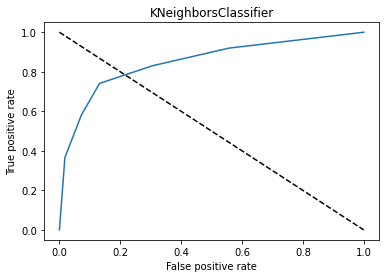

In [109]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

In [110]:
confusion_matrix(y_test, predc)

array([[145,  22],
       [ 29,  83]], dtype=int64)